In [1]:
import warnings
import pandas as pd
from datetime import datetime
from datetime import date
import sqlalchemy as sql
from pathlib import Path
warnings.filterwarnings('ignore')  # Hide warnings
#Library - Project3 
import CryptoDownloadData as coinData
import CryptoPerfSummary as coinAnalytic
import EfficientFrontierCalculator as ef
import get_index_data as gp
import matplotlib.pyplot as plt
#from st_aggrid import AgGrid
#DataBase Tables
# Database connection string
crypto_data_connection_string = 'sqlite:///./Reference/crypto.db'
# Database engine
crypto_data_engine = sql.create_engine(crypto_data_connection_string, echo=True)
'COINBASE_100' #CoinList - symbols
'ETF_LIST' #Sample ETF
'CRYPTO_PX_HISTORY' #Crypto PX History

# If need to repopulate database sqllite, please set refresh = True
refresh = False

In [2]:
# Download all price history for Coin List 100 into CRYPTO_PX_HISTORY
# If need to rerun, please change refresh = True
if refresh == True:
    coinData.create_coinlist100
    coinData.create_sampleETF
    coinData.drop_table('CRYPTO_PX_HISTORY')
    start_date = datetime(2015, 1, 1)
    end_date = datetime.today()
    coinData.download_px_data_from_COINBASE_100(start_date, end_date)

In [3]:
farm_coins = gp.get_index_coins('YieldFarmingTokens')

meta_coins = gp.get_index_coins('TopMetaverseTokens')

coinbase_coins = gp.get_index_coins('Coinbase100')

In [4]:
farm_prices = gp.get_index_prices('YieldFarmingTokens')

meta_prices = gp.get_index_prices('TopMetaverseTokens')

coinbase_prices = gp.get_index_prices('Coinbase100')

In [6]:
farm_weights = ef.calculate_efficient_frontier(farm_prices)

meta_weights = ef.calculate_efficient_frontier(meta_prices)

coinbase_weights = ef.calculate_efficient_frontier(coinbase_prices)

In [9]:
farm_df = gp.get_index_df(farm_coins, farm_weights)

meta_df = gp.get_index_df(meta_coins, meta_weights)

coinbase_df = gp.get_index_df(coinbase_coins, coinbase_weights)

display(farm_df)
display(meta_df)
display(coinbase_df)

,Coins,Weights
0,CAKE,0.178061
1,AAVE,0.035234
2,CRV,0.123750
3,RLY,0.103395
4,SNX,0.019872
5,SUSHI,0.114434
6,RGT,0.242752
7,REEF,0.182502


,Coins,Weights
0,MANA,0.015583
1,SAND,0.018354
2,AXS,0.021332
3,THETA,0.043473
4,ENJ,0.107468
5,WEMIX,0.031214
6,WAXP,0.150507
7,RNDR,0.009148
8,SUSHI,0.091162
9,ONT,0.022716


,Coins,Weights
0,BTC,0.223910
1,ETH,0.090827
2,BNB,0.232724
3,USDC,0.009452
4,XRP,0.146298
5,ADA,0.011076
6,SOL,0.168650
7,LUNA,0.003889
8,AVAX,0.113173


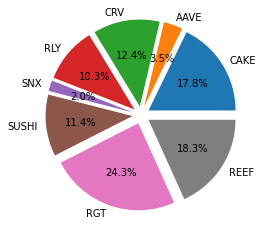

In [20]:
explode = [.1, .1, .1, .1, .1, .1, .1, .1]

fig_Farm, ax_Farm = plt.subplots()
ax_Farm.pie(farm_weights, explode = explode,labels = farm_coins, autopct='%1.1f%%', wedgeprops = {'linewidth': 10})
plt.savefig('farmPIE.png')

plt.show()

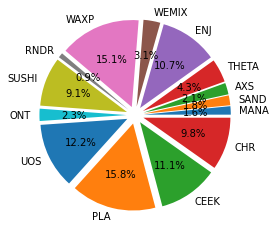

In [21]:
explode = [.1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1]

fig_Meta, ax_Meta = plt.subplots()
ax_Meta.pie(meta_weights, explode = explode,labels = meta_coins, autopct='%1.1f%%', wedgeprops = {'linewidth': 10})
plt.savefig('metaPIE.png')

plt.show()

In [ ]:
explode = [.1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .1]

fig_Meta, ax_Meta = plt.subplots()
ax_Meta.pie(meta_weights, explode = explode,labels = meta_coins, autopct='%1.1f%%', wedgeprops = {'linewidth': 10})
plt.savefig('metaPIE.png')

plt.show()